## Importing Dependencies

In [37]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


## Loading Dataset

In [38]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target)

## Data description

In [39]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## EDA

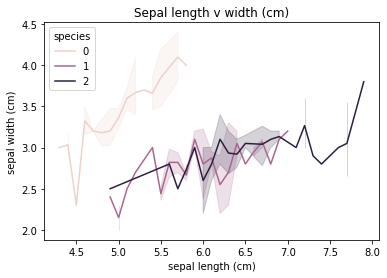

In [42]:
sns.lineplot(data=df,x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue = 'species').set(title='Sepal length v width (cm)')
plt.show()

- Sepal length is comparitively higher than the width for all species
- Species 0 is can be distinguished from other species with their Speal length and width
- Species 1 and 2 are very close to each other, which makes it harder to classify them using Speal length and width

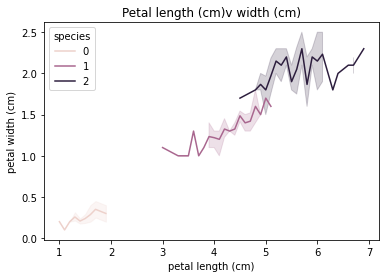

In [43]:
sns.lineplot(data=df,x=df['petal length (cm)'], y=df['petal width (cm)'], hue='species').set(title='Petal length (cm)v width (cm)')
plt.show()

- Sepal length is comparitively higher than the width for all species
- All three species can be clearly distinguished by their Petal length and width


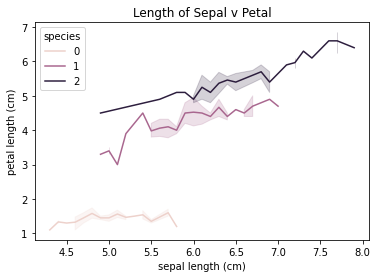

In [44]:
sns.lineplot(data=df,x=df['sepal length (cm)'], y=df['petal length (cm)'], hue = 'species').set(title='Length of Sepal v Petal')
plt.show()

- Sepal length is comparitively higher than the petal length for all species
- All three species can be clearly distinguished by the length of Sepal and Petal 

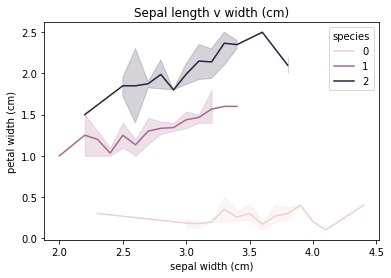

In [45]:
sns.lineplot(data=df,x=df['sepal width (cm)'], y=df['petal width (cm)'], hue = 'species').set(title='Sepal length v width (cm)')
plt.show()

- Sepal width is comparitively higher than the petal width for all species
- All three species can be clearly distinguished by the width of Sepal and Petal 

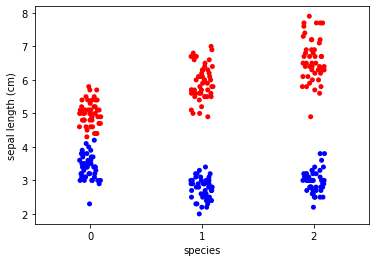

In [46]:
sns.stripplot(data=df,x='species',y='sepal width (cm)',color='b')
sns.stripplot(data=df,x='species',y='sepal length (cm)',color='r')
plt.show()

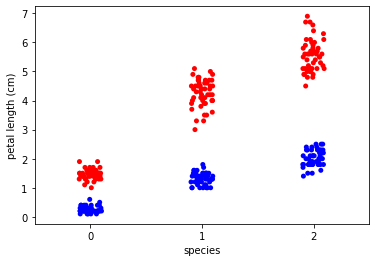

In [47]:
sns.stripplot(data=df,x='species',y='petal width (cm)',color='b')
sns.color_palette("Blues", 12)
sns.stripplot(data=df,x='species',y='petal length (cm)',color='r')
plt.show()

In [48]:
sepal_area = df['sepal length (cm)']*df['sepal width (cm)']
petal_area = df['petal length (cm)']*df['petal width (cm)']

In [49]:
adf = pd.DataFrame()
adf['sepal_area'] = sepal_area
adf['petal_area'] = petal_area
adf['y'] = df['species']
adf.head()

,sepal_area,petal_area,y
0,17.85,0.28,0
1,14.70,0.28,0
2,15.04,0.26,0
3,14.26,0.30,0
4,18.00,0.28,0


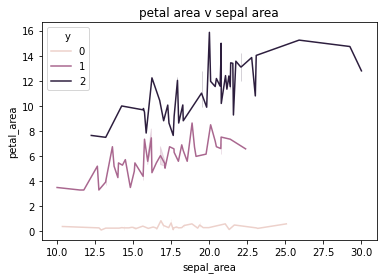

In [50]:
sns.lineplot(data=adf,x='sepal_area',y='petal_area',hue='y').set(title='petal area v sepal area')
plt.show()

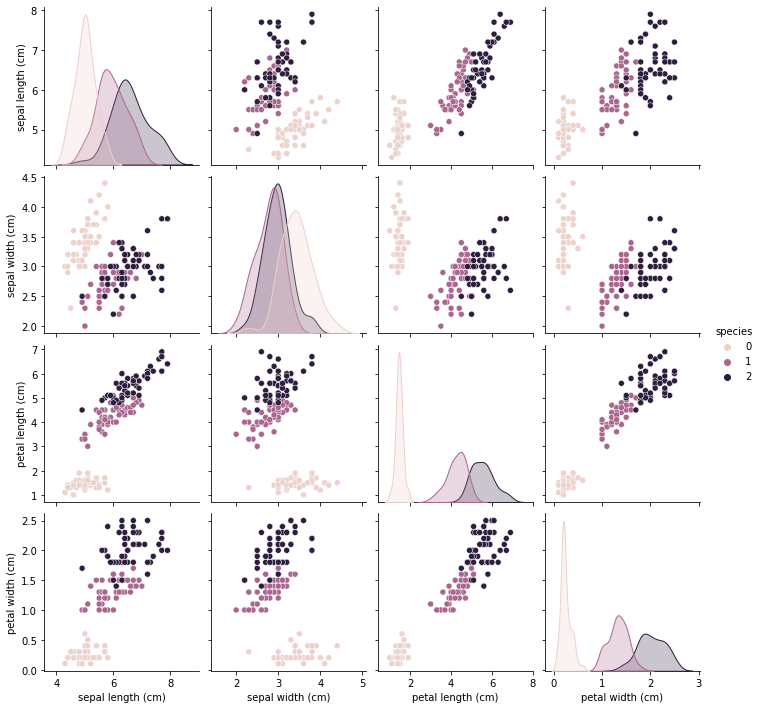

In [51]:
sns.pairplot(data=df,hue='species')
plt.show()

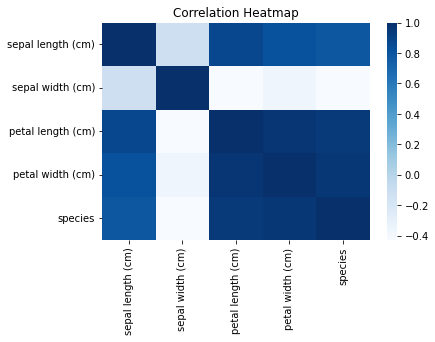

In [52]:
sns.heatmap(df.corr(),cmap='Blues').set(title='Correlation Heatmap')
plt.show()

## Model Building

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

X = df.drop('species',axis=1)
y = df.species

scaler = StandardScaler()
X = scaler.fit_transform(X) #Standardizing the dataset for better performance

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=42)

In [54]:
def model(model,Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain,ytrain)
    y_pred=model.predict(Xtest)
    print(confusion_matrix(ytest,y_pred))
    accuracy=accuracy_score(ytest,y_pred)*100
    print("Accuracy of the model is {:.2f}".format(accuracy))
    return y_pred

In [55]:
def plot():
    fig = plt.figure(figsize=(6,4))
    plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='winter')
    plot_svc_decision_fn(clf)
    fig.text(.5, .0001, "Decision boundary and support vectors",
            ha='center')
    plt.title('kernel SVM')
    plt.show()

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_pred = model(lr_model,Xtrain, ytrain, Xtest, ytest)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of the model is 100.00


In [62]:
!pip install -q mlxtend 
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'Decision Boundary produced by Logistic Regression')

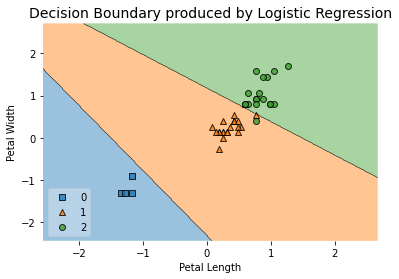

In [70]:
plot_decision_regions(Xtrain, ytrain.ravel(), lr_model, feature_index=[2,3], filler_feature_values={0:0, 1:0},
                      filler_feature_ranges={0: 1, 1: 1}, legend=3)
plt.ylabel('Petal Width')
plt.xlabel('Petal Length')
plt.title("Decision Boundary produced by Logistic Regression", size = 14)

### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_pred = model(nb_model,Xtrain, ytrain, Xtest, ytest)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of the model is 100.00


Text(0.5, 1.0, 'Decision Boundary produced by Naive Bayes')

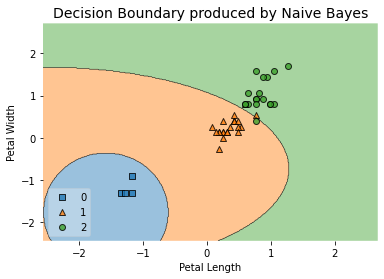

In [71]:
plot_decision_regions(Xtrain, ytrain.ravel(), nb_model, feature_index=[2,3], filler_feature_values={0:0, 1:0},
                      filler_feature_ranges={0: 1, 1: 1}, legend=3)
plt.ylabel('Petal Width')
plt.xlabel('Petal Length')
plt.title("Decision Boundary produced by Naive Bayes", size = 14)

### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_pred = model(knn_model,Xtrain, ytrain, Xtest, ytest)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of the model is 100.00


Text(0.5, 1.0, 'Decision Boundary produced by KNN')

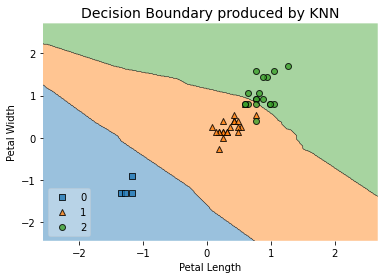

In [72]:
plot_decision_regions(Xtrain, ytrain.ravel(), knn_model, feature_index=[2,3], filler_feature_values={0:0, 1:0},
                      filler_feature_ranges={0: 1, 1: 1}, legend=3)
plt.ylabel('Petal Width')
plt.xlabel('Petal Length')
plt.title("Decision Boundary produced by KNN", size = 14)

### SVM

In [59]:
from sklearn.svm import SVC
svc_model = SVC(kernel = "linear")
svc_pred = model(svc_model,Xtrain, ytrain,Xtest,ytest)
#svc_pred = svc_model.fit(Xtrain, ytrain)


[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy of the model is 96.67


Text(0.5, 1.0, 'Decision Boundary produced by SVM')

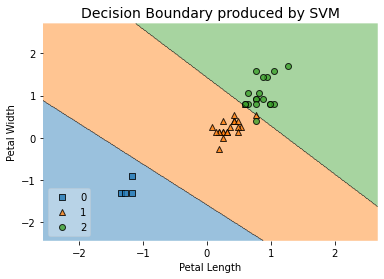

In [77]:
plot_decision_regions(Xtrain, ytrain.ravel(), svc_model, feature_index=[2,3], filler_feature_values={0:0, 1:0},
                      filler_feature_ranges={0: 1, 1: 1}, legend=3)
plt.ylabel('Petal Width')
plt.xlabel('Petal Length')
plt.title("Decision Boundary produced by SVM", size = 14)